# King County Real Estate Project

![](https://upload.wikimedia.org/wikipedia/commons/a/a8/SeattleSkylineFromKerryPark.jpg)

## I.    Business_Understanding

For this project, my firm was retained by a mid-sized, well established, local real estate broker from the King County region of Washington State, located atop of Queen Anne hill, overlooking the lower South Lake Union area ('Client'). Client has a large crew of seasoned real estate agents, loan officers, lead generation experts, and other sales supply chain specialists ('Team'). Recently, Client has become aware of how its competitors have been leveraging the abundance of real estate data available about the King County market in order to gain competitive advantages.  Client similarly seeks to confirm and/or supplement Team's preconceived notions about what really drives residential real estate sales in King County.  As such, Client is requesting a multivariate linear regression analysis of the King County real estate market, with `price` being the primary dependent variable.  

![](https://upload.wikimedia.org/wikipedia/commons/e/ee/Queen-anne-houses.jpg)

## II.  Data Understanding and Methods

### A.  Purpose

The goal for this analysis was to provide Client with actionable insights regarding the most important independent factors impacting residential real estate `price` in King County. 

### B.  Data

- **Records and Variables**

    The scope of this analysis was limited to records of homes sold between 06-10-2021 and 06-09-2022.  Each record or ('row') in the data represents a home with a listed `price` determined by its most recent sale within the aforementioned time period.  Each column, except for the dependent variable `price`, represents an independent variable.  


- **Base Data Source**

    Based on survey responses and other direct input from Team, Client provided a list of independent variables hypothesized to be successful predictors for the `price` of residential homes in King County, without any ranking or grouping.  From that list, fields were populated from data available to the public on the [King County Assessor Data Download page](https://info.kingcounty.gov/assessor/DataDownload/default.aspx).('Baseline Data') A full index of the variables or ('columns'), including the target variable `price`, are located [here](http://localhost:8888/edit/data/column_names.md).  The `address`, `lat`, and `long` fields were retrieved using a third-party [geocoding API](https://docs.mapbox.com/api/search/geocoding/). 


- **Additional Data Source**

    Signifant data exploration outside the Baseline Dataset was performed in an attempt to provide the model more diverse information.  Ulitimately, the analysis utilized additional data obtained through the [King County GIS Open Data Site](https://data.kingcounty.gov/County-Operations/King-County-GIS-Open-Data-site/wuuf-xywg) regarding geographic points of interest.   

### C.   Methodology

The guiding principal underlying this analysis was the establishment of a Bayesian style iterative update process, beginning with an initial baseline multivariate linear regression model utilizing only the preprocessed Baseline Data.  From there, additional models were constructed by continuously incorporating new information, through both feature engineering and the use of additional data sources, while simultaneously maintaining, as much as possible, the fundamental assumptions of linear regression.  

##### Measurements


1. R-squared

    All models were evaluated using an adjusted R-squared metric, a version of the popular closed form method of ordinary least squares.  The adjusted R-squared method is a relative metric that calculates the proportion of explained variance, while also taking into account the multivariate nature of the model.  


2. F-statistic and statistical significance

    All features used in the model were ultimately validated with the traditional ANOVA based test for statistical signficance.


3. Mean Absolute Errors

    Model performance was checked by direct error based metrics, including a calculation of the Mean Absolute Error('MAE').  MAE is a calculation of the average distance of total errors in the model regardless of whether they are positive or negative. 


4. Root Mean Squared Error 

    Another error based metric used in this report was the Root Mean Squared Error - a calculation that takes the squared value of each individual error, sums them, and then takes square root of the total.  This metric is important because it gives errors greater weight based on their relative magnitude.  

5. The Rainbow test was employed as a measure of linearity.  
    
6. The Omnibus and Jacques Barre tests were used to meansure the model for normality.  

##### Procedures

Using the [CRISP](http://localhost:8888/view/data/Capstone%20Project%20Introduction%20-%20AWS-DA.png) method as a guideline, Baseline Data was first collected, preprocessed and modeled, using only numerical data ('Baseline Model'). 
A lengthy data exploration process was then undertaken that involved numerious iterations and process permutations based on constant remodeling and testing.  

This includes but was not limited to the following:

    -Visualization of relationships between independent variables and the target variable. 
    -feature engineering, sometimes using additional data pulled in from other resources. 
    -outliers were removed from numerical distributions and categorical data was label encoded.  
    -metrics from new models were measured against the Baseline Model and other iterations 
    -independent variables were tested for multicollinearity and removed if found to improve model performance. 
    -residuals were visualized and examined for linearity, normality and homoskedacity.  

##### transformations

Ultimately, tests for normality and linearity continued to fail despite attempts to clean and remodel the data. Due the hyperbolic distribution of `price` and peculiar distribution of `sqft_lot`, they were selected for log transformations.  


## Findings and Conclusions
Results from log transformation were marginally successful, pushing adjusted R-squared from 77.4 percent to 77.7 percent.  In addition, RMSE and MAE both fell to new lows.  Notably, these scores may not be a useful comparison with the baseline model, as it may be like comparing apples and oranges, but it does seem to 

The most signficant increases in model performance were obtained through the engineering of geographic features. To a lesser extent, but still very impactful, was the removal of outliers beyond three standard deviations for our numerical predictors, which greatly improved performance. Finally, modest gains in performance were achieved through log transformations of the target and `sqft_lot`. If more time permitted, further transformations might have reduced errors and improved performance further.  

Prior to the log transformations, an adjusted R-squared of 77.4 of variance was explained by our final model. 
This R-squared number was achieved together with a MAE of 208985.34 and RMSE of 323949.93, with nearly 125 variables. 
Categorical variables that were not statistically significant were left in the final model, but their coefficients were not interpreted.  When said variables were removed from the model, R-squared went down and MAE/RMSE levels rose, thus they proved necessary for the model as constructed.  In addition, while `sqft_living` was highly correlated with both `sqft_above` and `bathrooms`, the elimination of any of the variables caused the performance of the model to go down while simultaneously causing an increase in errors.  


## Data Preparation

##### Loading the Data and Programming tools

In [38]:
#importing all appropriate Pythonic libraries and packages 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats as stats
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [39]:
# reading in the King County dataset to Pandas
df = pd.read_csv('data/kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


### Data Exploration

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

### Preprocessing

In [41]:
# dropping the placeholder column
df.drop(labels='id', axis=1, inplace=True)

In [42]:
# converting all dates to datetime
df['date'] = pd.to_datetime(df['date'])

# renaming date to selldate
rnmdate = {'date':'selldate'}
df.rename(columns=rnmdate, inplace=True)

In [43]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


#### Data Cleaning

In [44]:
# identifying missing values 
df.isna().sum()/df.shape[0]

selldate         0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.000000
greenbelt        0.000000
nuisance         0.000000
view             0.000000
condition        0.000000
grade            0.000000
heat_source      0.001061
sewer_system     0.000464
sqft_above       0.000000
sqft_basement    0.000000
sqft_garage      0.000000
sqft_patio       0.000000
yr_built         0.000000
yr_renovated     0.000000
address          0.000000
lat              0.000000
long             0.000000
dtype: float64

In [45]:
# remove missing values in columns
df.dropna(subset=['heat_source', 'sewer_system'], axis=0, inplace=True)

### Target distribution

First we will look at the `price` distribution. 

<AxesSubplot:xlabel='price', ylabel='Density'>

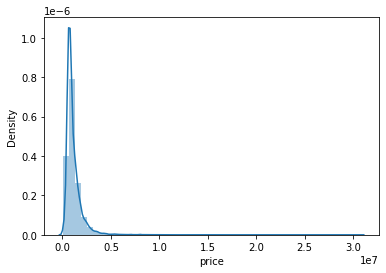

In [46]:
sns.distplot(df['price'])

In [47]:
df.corr()['price']

price            1.000000
bedrooms         0.288954
bathrooms        0.480337
sqft_living      0.608616
sqft_lot         0.086550
floors           0.180589
sqft_above       0.538631
sqft_basement    0.245005
sqft_garage      0.263674
sqft_patio       0.313789
yr_built         0.095796
yr_renovated     0.085023
lat              0.063430
long            -0.022278
Name: price, dtype: float64

## Construction of a Baseline Model

In [50]:
# Creating categorical variables
cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'grade']]
cats1 = df[['price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'grade', 'selldate']]
cats2 = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'grade', 'lat', 'long', 'selldate']]

In [51]:
pred_cols = [x for x in df.columns if x not in cats1]

In [52]:
pred_cols2 = [x for x in df.columns if x not in cats2]

In [53]:
pred_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'sqft_above',
 'sqft_basement',
 'sqft_garage',
 'sqft_patio',
 'yr_built',
 'yr_renovated',
 'lat',
 'long']

In [54]:
# create baseline model
preds = df[pred_cols]
target = df['price']

In [55]:
y = target
X = preds
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     1641.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:26:30   Log-Likelihood:            -4.4737e+05
No. Observations:               30111   AIC:                         8.948e+05
Df Residuals:                   30097   BIC:                         8.949e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.337e+06   4.08e+05     15.549      0.000    5.54e+06    7.14e+06
bedrooms      -1.668e+05   5466.758    -30.515      0.000   -1.78e+05   -1.56e+05
bathrooms      1.376e+05   8057.294     17.076      0.000    1.22e+05    1.53e+05
sqft_living     333.4676     18.296     18.226      0.000     297.606     369.329
sqft_lot         -0.0918      0.068     -1.355      0.175      -0.225       0.041
floors        -8653.0790   9867.585     -0.877      0.381    -2.8e+04    1.07e+04
sqft_above      292.0444     18.672     15.640      0.000     255.446     328.643
sqft_basement   164.7872     13.700     12.028      0.000     137.935     191.640
sqft_garage    -145.3105     19.107     -7.605      0.000    -182.761    -107.860
sqft_patio      265.2086     17.948     14.776      0.000     230.030     300.388
yr_built      -3229.8579    187.152    -17.258      0.000   -3596.685   -2863.031
yr_renovated     50.6331     10.029      5.049      0.000      30.976      70.291
lat            3.176e+04   4285.681      7.412      0.000    2.34e+04    4.02e+04
long           1.166e+04   1077.357     10.823      0.000    9548.792    1.38e+04
==============================================================================
Omnibus:                    43155.173   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         48355819.947
Skew:                           8.091   Prob(JB):                         0.00
Kurtosis:                     198.653   Cond. No.                     6.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
baseline_mae = mean_absolute_error(y, results.predict(sm.add_constant(X)))
baseline_mae

380075.1337843631

In [58]:
mean_squared_error(y, results.predict(sm.add_constant(X)), squared=False)

685790.0783627378

This baseline model is limited to both discrete and continuous numeric predictors.  Based on the Mean Absolute Error ('MAE'), overall this baseline model is off by about an average of $380,075.13 for any given prediction. Nevertheless, when evaluating the Root Mean Squared Error ('RMSE'), that approximation is approaching almost double, at $685,790 off any given prediction.  The model is statistically significant overall and explains about 41.5 percent of the variance in `price`. 

The intercept is , at minus 9 to the 7th power, which makes it very hard to interpret.  

- For each additional square foot of in `sqft_living`, the price increases by about $327. 

- For each additional square foot of in `sqft_above`, the price increases by about $295. 

- For each additional square foot of in `sqft_basement`, the price increases by about $82. 

These all seem reasonable, however, there are some really odd coefficients.  

- For each additional square foot of in `sqft_patio`, the price increases by about $262.

- For each additional square foot of in `sqft_lot`, the price increases by about $0.19. 

- For each additional square foot of in `sqft_basement`, the price **decreases** by about $35. 


These are all bizarre figures.   


At first glance, `sqft_living` is the most highly correlated feature in the baseline numeric model.    

Sqft_lot has a strange coeeficient.  One would think sqft_lot would be a major factor in the price.  

Engineering Geographic features


In [725]:
# isolating the zip code 
# alternative methods to achieve same
# df['Zipcode'] = df['address'].str.extract(r'(\d{5}\-?\d{0,4})')
# df['address'][0].split(',')[2][-5:]
# df['address'][1000][-20:-15]

df['Zipcode'] = df['address'].apply(lambda x: x[-20:-15])

df['Zipcode'] = df['Zipcode'].astype(int)

# controling for outliers in zipcode preprocessing
df = df.loc[(df['Zipcode'].astype(int) > 98000) & (df['Zipcode'].astype(int) <= 98922)]

df.Zipcode.nunique()

88

<AxesSubplot:>

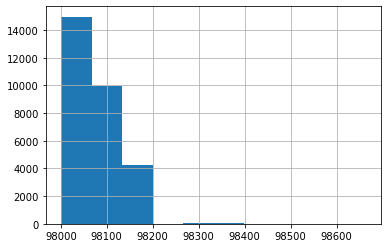

In [726]:
df['Zipcode'].hist()

Price is the singular dependent variable in our model.

In [666]:
# df.select_dtypes('number')

### Scaling

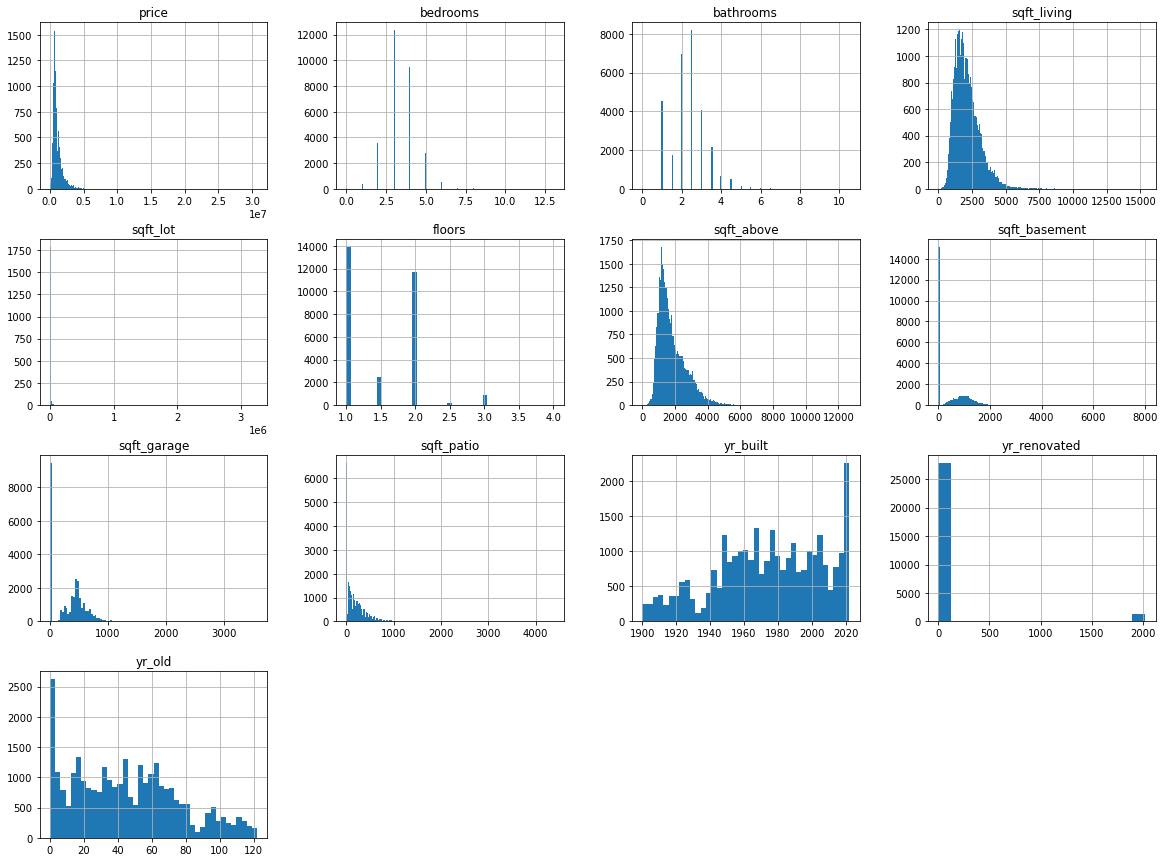

In [667]:
df[pred_cols2].hist(figsize=(20,15), bins="auto");

The distribution in price seems to be exponential and heavily right skewed.  A log transformation seems reasonable in order to alleviate the impact of both the outliers and their residuals on our interpretation.  

`sqft_lot` and `price` are on entirely different scales from our other variables.  Lets get a better picture as to what we are seeing by scaling the data.  

In [668]:
scaler = StandardScaler()

In [669]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [670]:
model_scaled = sm.OLS(y.values, sm.add_constant(X_scaled)).fit()
model_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     1954.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:56:12   Log-Likelihood:            -4.3197e+05
No. Observations:               29200   AIC:                         8.640e+05
Df Residuals:                   29185   BIC:                         8.641e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.113e+06   3765.893    295.550      0.000    1.11e+06    1.12e+06
bedrooms      -1.362e+05   5075.272    -26.833      0.000   -1.46e+05   -1.26e+05
bathrooms      1.054e+05   6889.177     15.305      0.000    9.19e+04    1.19e+05
sqft_living    3.201e+05   1.69e+04     18.994      0.000    2.87e+05    3.53e+05
sqft_lot       1.184e+04   3914.830      3.025      0.002    4169.953    1.95e+04
floors        -5.208e+04   5370.763     -9.697      0.000   -6.26e+04   -4.16e+04
sqft_above     2.602e+05   1.55e+04     16.784      0.000     2.3e+05    2.91e+05
sqft_basement  4.834e+04   7673.807      6.299      0.000    3.33e+04    6.34e+04
sqft_garage    -1.01e+04   5240.719     -1.928      0.054   -2.04e+04     167.180
sqft_patio     6.466e+04   4208.843     15.362      0.000    5.64e+04    7.29e+04
yr_built       8.632e+04    2.3e+04      3.745      0.000    4.11e+04    1.31e+05
yr_renovated   8.575e+04   9718.404      8.824      0.000    6.67e+04    1.05e+05
lat            2.265e+05   3969.061     57.063      0.000    2.19e+05    2.34e+05
long          -1.716e+04   4446.417     -3.859      0.000   -2.59e+04   -8442.127
yr_old         1.501e+05   2.27e+04      6.618      0.000    1.06e+05    1.95e+05
==============================================================================
Omnibus:                    45281.582   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         77556338.212
Skew:                           9.388   Prob(JB):                         0.00
Kurtosis:                     254.779   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# section_2

## Adding geographic categorical features

In [671]:
# reading in the King County dataset to Pandas
df_dem = pd.read_csv('data/Points_of_Interest.csv')
df_dem

,X,Y,OBJECTID,FEATURE_ID,ESITE,CODE,NAME,ABB_NAME,ADDRESS,ZIPCODE
0,-122.067101,47.465386,1,10000032,5733.0,66,Station 79,79,20505 SE 152nd St,98059.0
1,-122.313910,47.552302,2,905,490884.0,664,Cleveland STEM High School,Cleveland,5511 15th Ave S,98108.0
2,-122.195782,47.657500,3,6600168,35858.0,663,Northwest University,NW University,5520 108th Ave NE,98033.0
3,-122.264083,47.319432,4,7,33.0,660,Evergreen Heights Elementary School,Evergreen Heights,5602 S 316th St,98001.0
4,-122.261359,47.333845,5,6600283,692199.0,660,Meredith Hill Elementary School,Hill,5830 S 300th St,98001.0
...,...,...,...,...,...,...,...,...,...,...
5632,-122.234595,47.381758,5633,10001602,898062.0,695,Public Halal Market,Public Halal Market,225 W MEEKER ST,98032.0
5633,-122.296801,47.415187,5634,10001603,391412.0,695,SeaTac International Market& Deli,SeaTac International Market& Deli,20804 INTERNATIONAL BLVD,98198.0
5634,-122.297787,47.407385,5635,10001604,758056.0,695,Madina Halal Market,Madina Halal Market,21630 PACIFIC HWY S,98198.0
5635,-122.177136,47.706192,5636,10001605,36305.0,695,Sahand,Sahand,12047 124TH AVE NE,98034.0


In [672]:
df_dem['CODE'].nunique()

50

In [673]:
df_dem.drop(labels=['OBJECTID','FEATURE_ID', 'ESITE', 'ABB_NAME', 'ADDRESS'], axis=1, inplace=True)

In [674]:
import geopy.distance

In [675]:
df_dem.CODE.value_counts(normalize = True)

600    0.259713
800    0.188398
695    0.073443
660    0.053929
60     0.029448
66     0.028739
330    0.022530
664    0.021111
530    0.020933
570    0.020401
902    0.017563
64     0.017208
360    0.015256
661    0.014724
390    0.014369
690    0.014015
901    0.013482
662    0.012418
510    0.011886
65     0.011354
120    0.011176
630    0.008870
580    0.008870
90     0.008160
903    0.007273
300    0.006564
63     0.006564
180    0.006564
904    0.006209
420    0.005854
62     0.005677
665    0.005499
663    0.005322
240    0.004967
480    0.004790
30     0.004790
67     0.004612
150    0.003725
999    0.003193
666    0.003016
61     0.002838
210    0.002484
500    0.002484
340    0.002306
68     0.002129
720    0.001951
520    0.001064
581    0.001064
450    0.000887
270    0.000177
Name: CODE, dtype: float64

In [676]:
rename_zip = {'ZIPCODE':'Zipcode'}
df_dem.rename(columns=rename_zip, inplace=True)

In [677]:
rename_long = {'X': 'long'}
rename_lat = {'Y': 'lat'}


In [678]:
df_dem.rename(columns=rename_long, inplace=True)
df_dem.rename(columns=rename_lat, inplace=True)

In [679]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5637 entries, 0 to 5636
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   long     5637 non-null   float64
 1   lat      5637 non-null   float64
 2   CODE     5637 non-null   int64  
 3   NAME     5637 non-null   object 
 4   Zipcode  5625 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 220.3+ KB


In [680]:
df_dem.isna().sum()/df_dem.shape[0]

long       0.000000
lat        0.000000
CODE       0.000000
NAME       0.000000
Zipcode    0.002129
dtype: float64

In [681]:
df_dem.dropna(subset=['Zipcode'], axis=0, inplace=True)

In [682]:
df_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 0 to 5636
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   long     5625 non-null   float64
 1   lat      5625 non-null   float64
 2   CODE     5625 non-null   int64  
 3   NAME     5625 non-null   object 
 4   Zipcode  5625 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 263.7+ KB


In [683]:
df.long

0       -122.19052
1       -122.35591
2       -122.22520
3       -122.29020
4       -122.07188
           ...    
30150   -122.32940
30151   -122.38851
30152   -122.29585
30153   -122.18908
30154   -122.32634
Name: long, Length: 29200, dtype: float64

In [684]:
df.lat

0        47.461975
1        47.711525
2        47.502045
3        47.566110
4        47.532470
           ...    
30150    47.664740
30151    47.565610
30152    47.610395
30153    47.449490
30154    47.435840
Name: lat, Length: 29200, dtype: float64

In [685]:
house_coord = np.array(list(zip(df.lat, df.long)))

In [686]:
# df.info()

### Distances of homes to the Nearest Hospital

In [687]:
business = df_dem.loc[df_dem['CODE'] == 420]

In [688]:
df_loc = list(zip(business.lat, business.long))

closest = []

for houseloc in house_coord:
    sortlist = []
    for hosploc in df_loc:
        sortlist.append(geopy.distance.great_circle(houseloc, hosploc).miles)
    closest.append(min(sortlist))

df['business_center'] = closest

In [689]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   selldate         29200 non-null  datetime64[ns]
 1   price            29200 non-null  float64       
 2   bedrooms         29200 non-null  int64         
 3   bathrooms        29200 non-null  float64       
 4   sqft_living      29200 non-null  int64         
 5   sqft_lot         29200 non-null  int64         
 6   floors           29200 non-null  float64       
 7   waterfront       29200 non-null  object        
 8   greenbelt        29200 non-null  object        
 9   nuisance         29200 non-null  object        
 10  view             29200 non-null  object        
 11  condition        29200 non-null  object        
 12  grade            29200 non-null  object        
 13  heat_source      29200 non-null  object        
 14  sewer_system     29200 non-null  objec

#### distance to transit centers

In [690]:
clinic = df_dem.loc[df_dem['CODE'] == 340]

In [691]:
df_loc = list(zip(clinic.lat, clinic.long))

closest = []

for houseloc in house_coord:
    sortlist = []
    for loc in df_loc:
        sortlist.append(geopy.distance.great_circle(houseloc, loc).miles)
    closest.append(min(sortlist))

df['clinic'] = closest

### Distance to elementary schools

In [692]:
elementary_schools = df_dem.loc[df_dem['CODE'] == 660]

In [693]:
df_loc = list(zip(elementary_schools.lat, elementary_schools.long))

closest = []

for houseloc in house_coord:
    sortlist = []
    for loc in df_loc:
        sortlist.append(geopy.distance.great_circle(houseloc, loc).miles)
    closest.append(min(sortlist))

df['closest_elem_schools'] = closest

Iterations were made using a `city` and `neighborhood` geographic categorical feature.  These were both found significantly correlated with `Zipcode`.  

[section_1](#section_1)
[section_3](#section_3)   

In [694]:
# df = df.merge(df_zip, how='left', on='Zipcode')

In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   selldate              29200 non-null  datetime64[ns]
 1   price                 29200 non-null  float64       
 2   bedrooms              29200 non-null  int64         
 3   bathrooms             29200 non-null  float64       
 4   sqft_living           29200 non-null  int64         
 5   sqft_lot              29200 non-null  int64         
 6   floors                29200 non-null  float64       
 7   waterfront            29200 non-null  object        
 8   greenbelt             29200 non-null  object        
 9   nuisance              29200 non-null  object        
 10  view                  29200 non-null  object        
 11  condition             29200 non-null  object        
 12  grade                 29200 non-null  object        
 13  heat_source     

In [696]:
# identify missing data in new dataset
df.isna().sum()/df.shape[0]
# df.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

selldate                0.0
price                   0.0
bedrooms                0.0
bathrooms               0.0
sqft_living             0.0
sqft_lot                0.0
floors                  0.0
waterfront              0.0
greenbelt               0.0
nuisance                0.0
view                    0.0
condition               0.0
grade                   0.0
heat_source             0.0
sewer_system            0.0
sqft_above              0.0
sqft_basement           0.0
sqft_garage             0.0
sqft_patio              0.0
yr_built                0.0
yr_renovated            0.0
address                 0.0
lat                     0.0
long                    0.0
Zipcode                 0.0
yr_old                  0.0
business_center         0.0
clinic                  0.0
closest_elem_schools    0.0
dtype: float64

In [697]:
# df.dropna(subset=['Population', 'Neighborhood'], axis=0, inplace=True)

In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   selldate              29200 non-null  datetime64[ns]
 1   price                 29200 non-null  float64       
 2   bedrooms              29200 non-null  int64         
 3   bathrooms             29200 non-null  float64       
 4   sqft_living           29200 non-null  int64         
 5   sqft_lot              29200 non-null  int64         
 6   floors                29200 non-null  float64       
 7   waterfront            29200 non-null  object        
 8   greenbelt             29200 non-null  object        
 9   nuisance              29200 non-null  object        
 10  view                  29200 non-null  object        
 11  condition             29200 non-null  object        
 12  grade                 29200 non-null  object        
 13  heat_source     

In [699]:
# no NA/missing values in merged dataset
df.isna().sum()/df.shape[0]

selldate                0.0
price                   0.0
bedrooms                0.0
bathrooms               0.0
sqft_living             0.0
sqft_lot                0.0
floors                  0.0
waterfront              0.0
greenbelt               0.0
nuisance                0.0
view                    0.0
condition               0.0
grade                   0.0
heat_source             0.0
sewer_system            0.0
sqft_above              0.0
sqft_basement           0.0
sqft_garage             0.0
sqft_patio              0.0
yr_built                0.0
yr_renovated            0.0
address                 0.0
lat                     0.0
long                    0.0
Zipcode                 0.0
yr_old                  0.0
business_center         0.0
clinic                  0.0
closest_elem_schools    0.0
dtype: float64

## Improving upon the baseline

HomeSales 
standard scaling allows you to find coefficients. 
Be sure to include metric - r squared - to describe overall model performance.  
collineriety 
log scalling
remove outliers.  
Increase r squared. 


1. run model
2. see improvements, clean/feature engineer.  
3. see coefficients becoming more accurate.


## Grade - a failed attempt at making an Ordinal category numeric

The above code, which was not used, was a brief lesson in why you do not want to force ordinal categories into continuous numeric variables, unless the values are in fact multiples of each other.    

## Lesson

scatter plot: visualize relationship  

box plot: gives you quantile info

histograms: distribution of frequencies 

qq plot residuals (outside of range) is 

In [554]:
# plt.boxplot(df1.price)

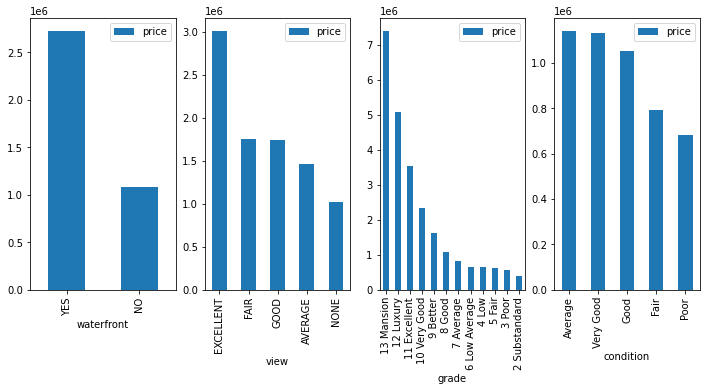

In [555]:
cats2 = ['waterfront', 'view', 'grade', 'condition']
fig, axes = plt.subplots(ncols=len(cats2), figsize=(12,5))
for index, feature in enumerate(cats2):
    df.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
        y='price', ax=axes[index])


(array([2.8412e+04, 6.7600e+02, 7.9000e+01, 1.7000e+01, 1.0000e+01,
        2.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.7360000e+04, 3.0996240e+06, 6.1718880e+06, 9.2441520e+06,
        1.2316416e+07, 1.5388680e+07, 1.8460944e+07, 2.1533208e+07,
        2.4605472e+07, 2.7677736e+07, 3.0750000e+07]),
 <BarContainer object of 10 artists>)

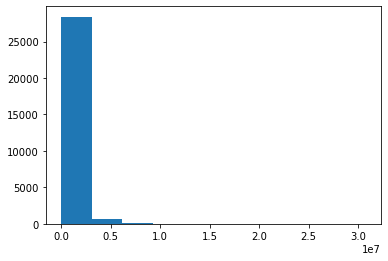

In [556]:
plt.hist(df['price'])

In [557]:
upper_limit = df['price'].mean() + 3*df['price'].std()
lower_limit = df['price'].mean() - 3*df['price'].std()
df['price'] = np.where(df['price'] > upper_limit, upper_limit,
np.where(df['price'] < lower_limit, lower_limit, df['price']))

In [558]:
# sns.heatmap(X.corr())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   selldate              29200 non-null  datetime64[ns]
 1   price                 29200 non-null  float64       
 2   bedrooms              29200 non-null  int64         
 3   bathrooms             29200 non-null  float64       
 4   sqft_living           29200 non-null  int64         
 5   sqft_lot              29200 non-null  int64         
 6   floors                29200 non-null  float64       
 7   waterfront            29200 non-null  object        
 8   greenbelt             29200 non-null  object        
 9   nuisance              29200 non-null  object        
 10  view                  29200 non-null  object        
 11  condition             29200 non-null  object        
 12  grade                 29200 non-null  object        
 13  heat_source     

## Discrete numeric predictors 

In [618]:
upper_limit = df['yr_old'].mean() + 3*df['yr_old'].std()
lower_limit = df['yr_old'].mean() - 3*df['yr_old'].std()
df['yr_old'] = np.where(df['yr_old'] > upper_limit, upper_limit,
np.where(df['yr_old'] < lower_limit, lower_limit, df['yr_old']))

In [619]:
upper_limit = df['floors'].mean() + 3*df['floors'].std()
lower_limit = df['floors'].mean() - 3*df['floors'].std()
df['floors'] = np.where(df['floors'] > upper_limit, upper_limit,
np.where(df['floors'] < lower_limit, lower_limit, df['floors']))

In [620]:
upper_limit = df['sqft_garage'].mean() + 3*df['sqft_garage'].std()
lower_limit = df['sqft_garage'].mean() - 3*df['sqft_garage'].std()

df['sqft_garage'] = np.where(df['sqft_garage'] > upper_limit, upper_limit,
    np.where(df['sqft_garage'] < lower_limit, lower_limit, df['sqft_garage']))

In [621]:
upper_limit = df['sqft_basement'].mean() + 3*df['sqft_basement'].std()
lower_limit = df['sqft_basement'].mean() - 3*df['sqft_basement'].std()

df['sqft_basement'] = np.where(df['sqft_basement'] > upper_limit, upper_limit,
    np.where(df['sqft_basement'] < lower_limit, lower_limit, df['sqft_basement']))

In [622]:
upper_limit = df['sqft_patio'].mean() + 3*df['sqft_patio'].std()
lower_limit = df['sqft_patio'].mean() - 3*df['sqft_patio'].std()

df['sqft_patio'] = np.where(df['sqft_patio'] > upper_limit, upper_limit,
    np.where(df['sqft_patio'] < lower_limit, lower_limit, df['sqft_patio']))

In [623]:
upper_limit = df['bedrooms'].mean() + 3*df['bedrooms'].std()
lower_limit = df['bedrooms'].mean() - 3*df['bedrooms'].std()
df['bedrooms'] = np.where(df['bedrooms'] > upper_limit, upper_limit,
np.where(df['bedrooms'] < lower_limit, lower_limit, df['bedrooms']))

In [624]:
upper_limit = df['bathrooms'].mean() + 3*df['bathrooms'].std()
lower_limit = df['bathrooms'].mean() - 3*df['bathrooms'].std()

df['bathrooms'] = np.where(df['bathrooms'] > upper_limit, upper_limit,
    np.where(df['bathrooms'] < lower_limit, lower_limit, df['bathrooms']))

In [625]:
upper_limit = df['sqft_above'].mean() + 3*df['sqft_above'].std()
lower_limit = df['sqft_above'].mean() - 3*df['sqft_above'].std()

df['sqft_above'] = np.where(df['sqft_above'] > upper_limit, upper_limit,
    np.where(df['sqft_above'] < lower_limit, lower_limit, df['sqft_above']))

In [626]:
upper_limit = df['sqft_lot'].mean() + 3*df['sqft_lot'].std()
lower_limit = df['sqft_lot'].mean() - 3*df['sqft_lot'].std()

df['sqft_lot'] = np.where(df['sqft_lot'] > upper_limit, upper_limit,
    np.where(df['sqft_lot'] < lower_limit, lower_limit, df['sqft_lot']))

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


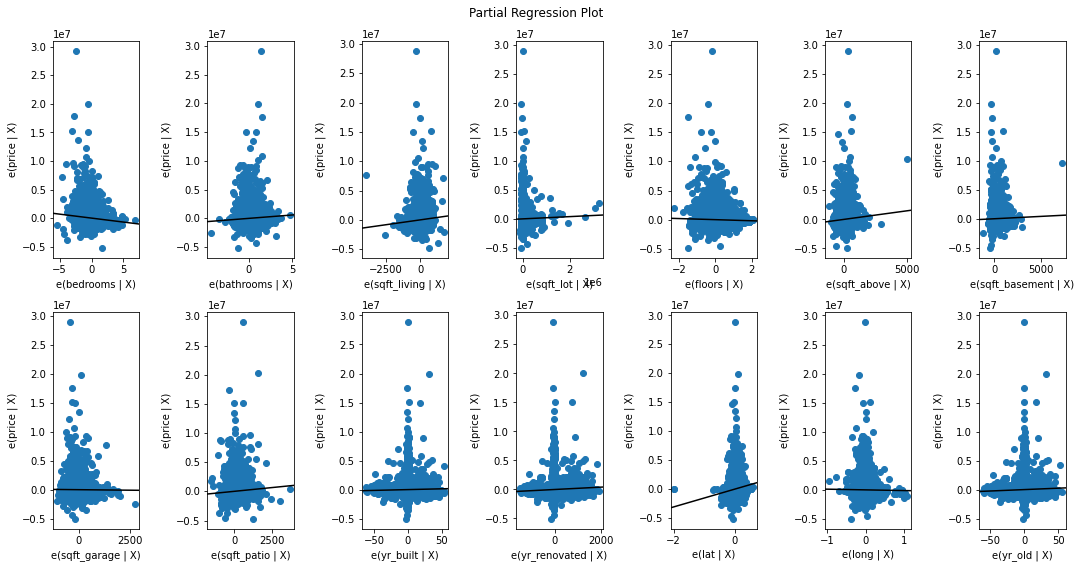

In [627]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results, 
    exog_idx=list(X.columns),
    grid=(2,7),
    fig=fig)
plt.tight_layout()
plt.show()
# model_1 = sm.OLS(y, sm.add_constant(X1))
# results1 = model_1.fit()
# results1.summary()

### Model Iteration

### Utilizing categorical variables

In [636]:
cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'Zipcode', 'grade']]
cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 
            'address', 'Zipcode', 'grade']]

In [637]:
cat_cols = cats.columns
dum_df = pd.get_dummies(data=df, columns=cat_cols, drop_first=True)

In [638]:
X1=dum_df.drop(labels=['selldate', 'price', 'address', 
                       'sewer_system_PUBLIC RESTRICTED', 'bedrooms', 'yr_old',
                      'heat_source_Oil', 'heat_source_Oil/Solar', 'heat_source_Other',
                       'grade_2 Substandard', 'heat_source_Electricity/Solar', 'lat', 'long'], axis=1)

In [639]:
y=dum_df.price

model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     798.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        21:55:27   Log-Likelihood:            -4.1194e+05
No. Observations:               29200   AIC:                         8.241e+05
Df Residuals:                   29074   BIC:                         8.252e+05
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.742e+05   2.18e+05      2.177      0.029    4.72e+04    9.01e+05
bathrooms                         3.86e+04   3961.481      9.743      0.000    3.08e+04    4.64e+04
sqft_living                       104.5405      7.625     13.711      0.000      89.596     119.485
sqft_lot                            3.7687      0.208     18.138      0.000       3.361       4.176
floors                          -6.144e+04   5619.891    -10.932      0.000   -7.25e+04   -5.04e+04
sqft_above                        176.6766      8.473     20.852      0.000     160.069     193.284
sqft_basement                      30.1226      6.438      4.679      0.000      17.503      42.742
sqft_garage                        15.9415     10.248      1.556      0.120      -4.145      36.028
sqft_patio                         24.4236     10.204      2.394      0.017       4.424      44.423
yr_built                           -8.2514    109.635     -0.075      0.940    -223.141     206.638
yr_renovated                       52.2104      4.926     10.599      0.000      42.555      61.866
business_center                 -1.746e+04   2387.882     -7.313      0.000   -2.21e+04   -1.28e+04
clinic                           8871.7232   2282.639      3.887      0.000    4397.646    1.33e+04
closest_elem_schools            -2.016e+04   5174.860     -3.896      0.000   -3.03e+04      -1e+04
waterfront_YES                     2.8e+05   1.77e+04     15.783      0.000    2.45e+05    3.15e+05
greenbelt_YES                    4.824e+04   1.25e+04      3.869      0.000    2.38e+04    7.27e+04
nuisance_YES                    -4.834e+04   5254.222     -9.201      0.000   -5.86e+04    -3.8e+04
view_EXCELLENT                   4.234e+05   1.79e+04     23.668      0.000    3.88e+05    4.58e+05
view_FAIR                        8.065e+04   2.36e+04      3.424      0.001    3.45e+04    1.27e+05
view_GOOD                        1.028e+05   1.34e+04      7.646      0.000    7.65e+04    1.29e+05
view_NONE                       -1.006e+05   8181.998    -12.291      0.000   -1.17e+05   -8.45e+04
condition_Fair                  -9.884e+04   2.22e+04     -4.448      0.000   -1.42e+05   -5.53e+04
condition_Good                   5.291e+04   4895.032     10.809      0.000    4.33e+04    6.25e+04
condition_Poor                  -7.328e+04   4.31e+04     -1.700      0.089   -1.58e+05    1.12e+04
condition_Very Good              1.145e+05   6850.676     16.713      0.000    1.01e+05    1.28e+05
heat_source_Gas                   1.42e+04   4685.011      3.030      0.002    5013.290    2.34e+04
heat_source_Gas/Solar            1.343e+05   3.41e+04      3.942      0.000    6.75e+04    2.01e+05
sewer_system_PRIVATE RESTRICTED -3.932e+05   1.49e+05     -2.644      0.008   -6.85

In [632]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

209701.26638758587

In [633]:
mean_squared_error(y, results1.predict(sm.add_constant(X1)), squared=False)

324770.98675017414

Text(0.5, 1.0, 'Linear Relationship Residual Plot')

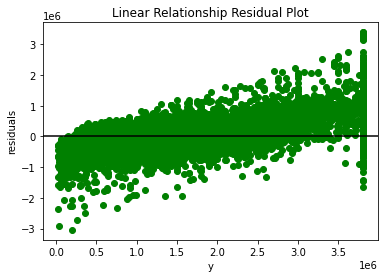

In [459]:
fig, ax = plt.subplots()
ax.scatter(y, results1.resid, color="green")
ax.axhline(y=0, color="black")
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Linear Relationship Residual Plot")

## Rainbow test

In [460]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(results1)

(1.036561677603984, 0.015204140279883252)

When performing a rainbow test, our null hypothesis is that there is no significant difference between the subset model and the full model - meaning the relationship is in fact linear.  Because the rainbow test yields a result that falls below .05 we must fail to reject the null hypothesis in our model, and consider the likelihood that there are factors in our model that are non linear. 

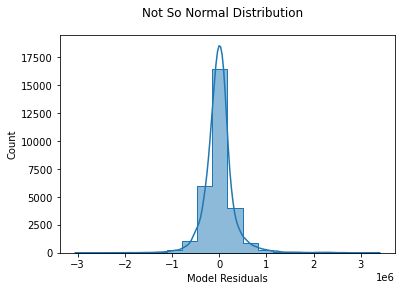

In [331]:
fig, ax = plt.subplots()
sns.histplot(results1.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Not So Normal Distribution");

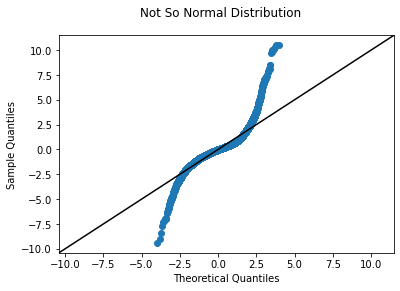

In [461]:
fig, ax = plt.subplots()
sm.graphics.qqplot(results1.resid, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Not So Normal Distribution");

Well, we have a much higher R-squared number after incorporating the dummified categorical predictors, as this model claims to explain 64 percent of the variance in `price`.   The constant is no longer statistically significant, so we need to adjust our figures to more accurately account for why that is happening.  We should next remove columns that are statistically significant.  

In [240]:
# def backward_regression(X1, y,
#                         initial_list=[], 
#                         threshold_in=0.01, 
#                         threshold_out = 0.05, 
#                         verbose=True):
#     included=list(X1.columns)
#     while True:
#         changed=False
#         model = sm.OLS(y, sm.add_constant(pd.DataFrame(X1[included]))).fit()
#         # use all coefs except intercept
#         pvalues = model.pvalues.iloc[1:]
#         worst_pval = pvalues.max() # null if pvalues is empty
#         if worst_pval > threshold_out:
#             changed=True
#             worst_feature = pvalues.idxmax()
#             included.remove(worst_feature)
#             if verbose:
#                 print(worst_feature, worst_pval)
#         if not changed:
#             break
#     return included

# (backward_regression(X1, y))

In [97]:
# included = ['bathrooms',
#  'sqft_living',
#  'sqft_lot',
#  'floors',
#  'sqft_above',
#  'sqft_basement',
#  'sqft_patio',
#  'yr_renovated',
#  'business_center',
#  'clinic',
#  'closest_elem_schools',
#  'waterfront_YES',
#  'greenbelt_YES',
#  'nuisance_YES',
#  'view_EXCELLENT',
#  'view_FAIR',
#  'view_GOOD',
#  'view_NONE',
#  'condition_Fair',
#  'condition_Good',
#  'condition_Very Good',
#  'heat_source_Gas',
#  'heat_source_Gas/Solar',
#  'sewer_system_PRIVATE RESTRICTED',
#  'sewer_system_PUBLIC',
#  'Zipcode_98004',
#  'Zipcode_98005',
#  'Zipcode_98006',
#  'Zipcode_98007',
#  'Zipcode_98008',
#  'Zipcode_98011',
#  'Zipcode_98014',
#  'Zipcode_98019',
#  'Zipcode_98022',
#  'Zipcode_98023',
#  'Zipcode_98024',
#  'Zipcode_98027',
#  'Zipcode_98028',
#  'Zipcode_98029',
#  'Zipcode_98030',
#  'Zipcode_98031',
#  'Zipcode_98033',
#  'Zipcode_98034',
#  'Zipcode_98038',
#  'Zipcode_98039',
#  'Zipcode_98040',
#  'Zipcode_98042',
#  'Zipcode_98045',
#  'Zipcode_98050',
#  'Zipcode_98052',
#  'Zipcode_98053',
#  'Zipcode_98055',
#  'Zipcode_98056',
#  'Zipcode_98057',
#  'Zipcode_98058',
#  'Zipcode_98059',
#  'Zipcode_98065',
#  'Zipcode_98070',
#  'Zipcode_98072',
#  'Zipcode_98074',
#  'Zipcode_98075',
#  'Zipcode_98077',
#  'Zipcode_98092',
#  'Zipcode_98102',
#  'Zipcode_98103',
#  'Zipcode_98105',
#  'Zipcode_98106',
#  'Zipcode_98107',
#  'Zipcode_98108',
#  'Zipcode_98109',
#  'Zipcode_98112',
#  'Zipcode_98115',
#  'Zipcode_98116',
#  'Zipcode_98117',
#  'Zipcode_98118',
#  'Zipcode_98119',
#  'Zipcode_98122',
#  'Zipcode_98125',
#  'Zipcode_98126',
#  'Zipcode_98133',
#  'Zipcode_98136',
#  'Zipcode_98144',
#  'Zipcode_98146',
#  'Zipcode_98148',
#  'Zipcode_98155',
#  'Zipcode_98166',
#  'Zipcode_98168',
#  'Zipcode_98177',
#  'Zipcode_98178',
#  'Zipcode_98188',
#  'Zipcode_98198',
#  'Zipcode_98199',
#  'Zipcode_98223',
#  'Zipcode_98224',
#  'Zipcode_98251',
#  'Zipcode_98270',
#  'Zipcode_98271',
#  'Zipcode_98272',
#  'Zipcode_98288',
#  'Zipcode_98338',
#  'Zipcode_98372',
#  'Zipcode_98387',
#  'Zipcode_98663',
#  'grade_11 Excellent',
#  'grade_12 Luxury',
#  'grade_13 Mansion',
#  'grade_3 Poor',
#  'grade_4 Low',
#  'grade_5 Fair',
#  'grade_6 Low Average',
#  'grade_7 Average',
#  'grade_8 Good',
#  'grade_9 Better']

In [241]:
# Out = [x for x in X1.columns if x not in included]
# Out

In [ ]:
# cats = df[['waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'grade', 'Zipcode']]
# cats1 = df[['selldate','price','waterfront','greenbelt', 'nuisance', 'view', 'condition', 'heat_source', 'sewer_system', 'address', 'Zipcode', 'grade']]

In [100]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

209177.13149212277

In [ ]:
# scaler = StandardScaler()

# X_scaled = pd.DataFrame(scaler.fit_transform(X1), columns=X1.columns)
# X_scaled.head()

# model_scaled = sm.OLS(y.values, sm.add_constant(X_scaled)).fit()
# model_scaled.summary()

# # X = sm.add_constant(X.values)
# # result = sm.OLS(Y.values, X).fit()

In [ ]:
# X_log.

## Addressing Multicolinerity

In [334]:
X1.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
bedrooms,1.000000,0.595112,0.634734,0.042069,0.196272,0.551352,0.233076,0.320571,0.199626,0.189495,...,0.105248,0.069623,0.044863,-0.032305,-0.083507,-0.165256,-0.250109,-0.104543,0.088031,0.172058
bathrooms,0.595112,1.000000,0.766619,0.090908,0.434958,0.673427,0.242213,0.467177,0.337865,0.466286,...,0.206426,0.150412,0.083459,-0.026976,-0.060524,-0.159304,-0.369216,-0.287224,0.190511,0.275892
sqft_living,0.634734,0.766619,1.000000,0.235741,0.355029,0.862328,0.313373,0.501524,0.400820,0.328501,...,0.300620,0.241335,0.176439,-0.024320,-0.061080,-0.145082,-0.309025,-0.330247,0.087435,0.307405
sqft_lot,0.042069,0.090908,0.235741,1.000000,-0.073471,0.231041,0.015775,0.186078,0.263182,0.015903,...,0.096726,0.085298,0.059540,0.021381,0.026118,0.047462,-0.011223,-0.083609,-0.043223,0.042438
floors,0.196272,0.434958,0.355029,-0.073471,1.000000,0.519826,-0.249644,0.182393,0.130906,0.521465,...,0.078250,0.047319,0.023059,-0.014774,-0.035083,-0.090356,-0.240467,-0.325595,0.225686,0.276635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grade_5 Fair,-0.165256,-0.159304,-0.145082,0.047462,-0.090356,-0.130265,-0.067502,-0.127738,-0.064717,-0.140424,...,-0.013657,-0.007487,-0.003315,-0.002030,-0.004591,1.000000,-0.038000,-0.093526,-0.076308,-0.043326
grade_6 Low Average,-0.250109,-0.369216,-0.309025,-0.011223,-0.240467,-0.288010,-0.112544,-0.302792,-0.149386,-0.308337,...,-0.038841,-0.021294,-0.009429,-0.005772,-0.013058,-0.038000,1.000000,-0.265996,-0.217025,-0.123222
grade_7 Average,-0.104543,-0.287224,-0.330247,-0.083609,-0.325595,-0.366611,0.029602,-0.196370,-0.179025,-0.270872,...,-0.095597,-0.052409,-0.023206,-0.014207,-0.032140,-0.093526,-0.265996,1.000000,-0.534145,-0.303275
grade_8 Good,0.088031,0.190511,0.087435,-0.043223,0.225686,0.097040,0.012914,0.117534,0.057057,0.252517,...,-0.077997,-0.042761,-0.018934,-0.011592,-0.026223,-0.076308,-0.217025,-0.534145,1.000000,-0.247441


In [335]:
abs(X1.corr()) > .75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
grade_5 Fair,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
grade_6 Low Average,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
grade_7 Average,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
grade_8 Good,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [462]:
X2 = X1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
X2['pairs'] = list(zip(X2.level_0, X2.level_1))
X2.set_index(['pairs'], inplace=True)
X2.drop(columns=['level_1', 'level_0'], inplace = True)
X2.columns = ['cc']
X2.drop_duplicates(inplace=True)
X2[(X2.cc>.75) & (X2.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.864381
"(bathrooms, sqft_living)",0.767852


In [337]:
X1.drop(columns=['yr_old'], inplace=True)

In [463]:
model_1 = sm.OLS(y, sm.add_constant(X1))
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     799.4
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:22:59   Log-Likelihood:            -4.1193e+05
No. Observations:               29200   AIC:                         8.241e+05
Df Residuals:                   29074   BIC:                         8.252e+05
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            7.148e+05   2.16e+05      3.304      0.001    2.91e+05    1.14e+06
bathrooms                        3.853e+04   3946.514      9.762      0.000    3.08e+04    4.63e+04
sqft_living                       101.7826      7.723     13.180      0.000      86.646     116.920
sqft_lot                            1.5869      0.087     18.338      0.000       1.417       1.757
floors                          -6.481e+04   5553.511    -11.670      0.000   -7.57e+04   -5.39e+04
sqft_above                        181.1213      8.514     21.274      0.000     164.434     197.809
sqft_basement                      32.3319      6.486      4.985      0.000      19.620      45.044
sqft_garage                        19.7583     10.229      1.932      0.053      -0.291      39.808
sqft_patio                         29.0468      9.908      2.932      0.003       9.627      48.467
yr_built                         -108.1090    109.122     -0.991      0.322    -321.994     105.776
yr_renovated                       52.0065      4.924     10.562      0.000      42.355      61.658
business_center                  -1.73e+04   2386.401     -7.249      0.000    -2.2e+04   -1.26e+04
clinic                           9468.9154   2280.222      4.153      0.000    4999.576    1.39e+04
closest_elem_schools            -2.141e+04   5180.701     -4.133      0.000   -3.16e+04   -1.13e+04
waterfront_YES                   2.916e+05   1.77e+04     16.449      0.000    2.57e+05    3.26e+05
greenbelt_YES                    4.725e+04   1.25e+04      3.792      0.000    2.28e+04    7.17e+04
nuisance_YES                    -4.679e+04   5247.287     -8.918      0.000   -5.71e+04   -3.65e+04
view_EXCELLENT                   4.234e+05   1.79e+04     23.678      0.000    3.88e+05    4.58e+05
view_FAIR                        7.972e+04   2.35e+04      3.386      0.001    3.36e+04    1.26e+05
view_GOOD                            1e+05   1.34e+04      7.441      0.000    7.37e+04    1.26e+05
view_NONE                        -1.01e+05   8178.223    -12.354      0.000   -1.17e+05    -8.5e+04
condition_Fair                  -9.372e+04   2.22e+04     -4.220      0.000   -1.37e+05   -5.02e+04
condition_Good                   5.501e+04   4894.397     11.240      0.000    4.54e+04    6.46e+04
condition_Poor                  -7.203e+04   4.31e+04     -1.672      0.094   -1.56e+05    1.24e+04
condition_Very Good              1.162e+05   6849.671     16.958      0.000    1.03e+05     1.3e+05
heat_source_Gas                  1.285e+04   4675.812      2.748      0.006    3686.013     2.2e+04
heat_source_Gas/Solar            1.324e+05    3.4e+04      3.889      0.000    6.57e+04    1.99e+05
sewer_system_PRIVATE RESTRICTED -4.181e+05   1.49e+05     -2.813      0.005   -7.09

In [339]:
mae = mean_absolute_error(y, results1.predict(sm.add_constant(X1)))
mae

209039.30308850488

In [340]:
mean_squared_error(y, results1.predict(sm.add_constant(X1)), squared=False)

323875.46979494195

## Categorical Variables

## Log Transformation of Lot Area and Price

With price and log seemingly skewed heavily to the right and having exponential curvature on the rise side, it may be easier to see the relationship if we log both variables.  

In [464]:
x_sqft_log = X1.copy()
x_sqft_log['log(sqft_lot)'] = np.log(x_sqft_log['sqft_lot'])
x_sqft_log[['sqft_lot', 'log(sqft_lot)']]

,sqft_lot,log(sqft_lot)
0,7140.0,8.873468
1,6703.0,8.810310
2,6156.0,8.725182
3,1400.0,7.244228
4,758.0,6.630683
...,...,...
30150,4000.0,8.294050
30151,5800.0,8.665613
30152,3600.0,8.188689
30153,2889.0,7.968666


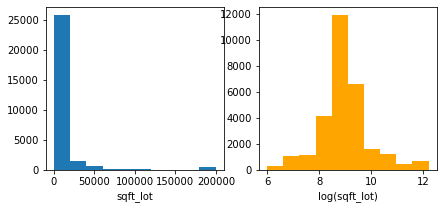

In [465]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,3))
ax1.hist(x_sqft_log['sqft_lot'])
ax1.set_xlabel("sqft_lot")
ax2.hist(x_sqft_log['log(sqft_lot)'], color = 'orange')
ax2.set_xlabel("log(sqft_lot)");

In [466]:
x_sqft_log.drop('sqft_lot', axis=1, inplace=True)
x_sqft_log

,bathrooms,sqft_living,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,business_center,...,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,log(sqft_lot)
0,1.0,1180,1.0,1180.0,0.0,0.0,40.0,1969,0,2.177829,...,0,0,0,0,0,0,1,0,0,8.873468
1,2.5,2770,1.0,1570.0,1570.0,0.0,240.0,1950,0,5.812094,...,0,0,0,0,0,0,1,0,0,8.810310
2,2.0,2880,1.0,1580.0,1580.0,0.0,0.0,1956,0,1.203895,...,0,0,0,0,0,0,1,0,0,8.725182
3,3.0,2160,2.0,1090.0,1070.0,200.0,270.0,2010,0,2.045081,...,0,0,0,0,0,0,0,0,1,7.244228
4,2.0,1120,2.0,1120.0,550.0,550.0,30.0,2012,0,1.972804,...,0,0,0,0,0,0,1,0,0,6.630683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,2.0,1910,1.5,1600.0,1130.0,0.0,210.0,1921,0,3.112088,...,0,0,0,0,0,0,0,1,0,8.294050
30151,2.0,2020,2.0,2020.0,0.0,0.0,520.0,2011,0,1.912342,...,0,0,0,0,0,0,1,0,0,8.665613
30152,2.0,1620,1.0,940.0,920.0,240.0,110.0,1995,0,1.690374,...,0,0,0,0,0,0,1,0,0,8.188689
30153,2.5,2570,2.0,1830.0,740.0,480.0,100.0,2006,0,1.796640,...,0,0,0,0,0,0,0,1,0,7.968666


In [467]:
sqft_log_model = sm.OLS(y, sm.add_constant(x_sqft_log))
sqft_log_results = sqft_log_model.fit()

print(sqft_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     814.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:23:15   Log-Likelihood:            -4.1172e+05
No. Observations:               29200   AIC:                         8.237e+05
Df Residuals:                   29074   BIC:                         8.247e+05
Df Model:                         125                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [468]:
baseline_mae = mean_absolute_error(y, sqft_log_results.predict(sm.add_constant(x_sqft_log)))
baseline_mae

207502.47926841985

In [469]:
mean_absolute_error(y, sqft_log_results.predict(sm.add_constant(x_sqft_log)))

207502.47926841985

In [470]:
mean_squared_error(y, sqft_log_results.predict(sm.add_constant(x_sqft_log)), squared=False)

321585.79505162354

In [345]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(sqft_log_results)

(1.0323119760370203, 0.027615632379733388)

/Users/chuck/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_SalePrice', ylabel='Density'>

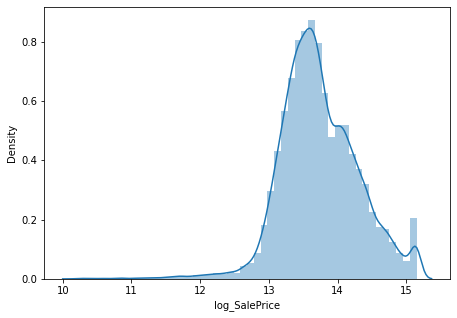

In [114]:
y_log = np.log(df['price'])
y_log.name = "log_SalePrice"
y_log

x_log = np.log(df['sqft_lot'])
x_log.name = "log_sqft_lot"

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(y_log)

/Users/chuck/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_sqft_lot', ylabel='Density'>

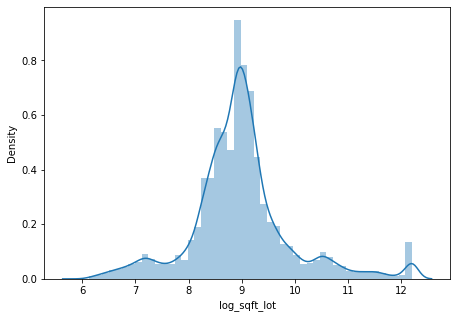

In [115]:
x_log = np.log(df['sqft_lot'])
x_log.name = "log_sqft_lot"

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(x_log)

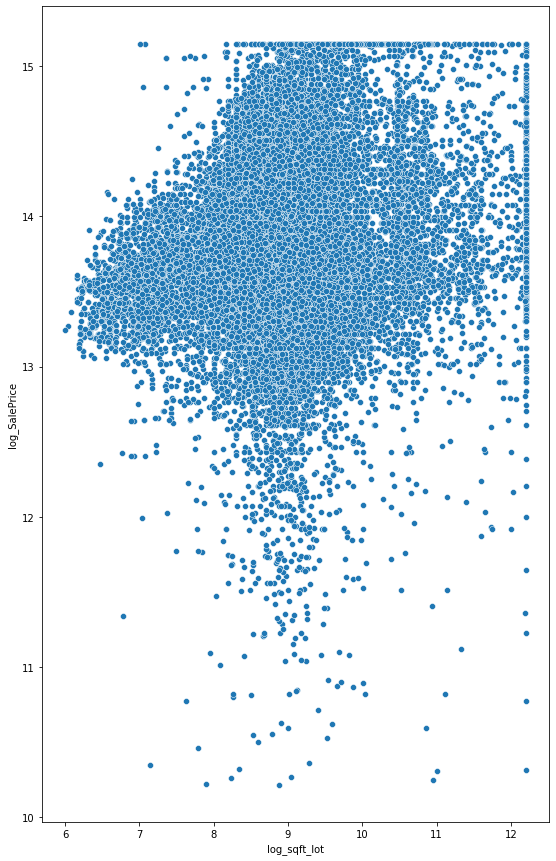

In [122]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
sns.scatterplot(x=x_log, y=y_log);

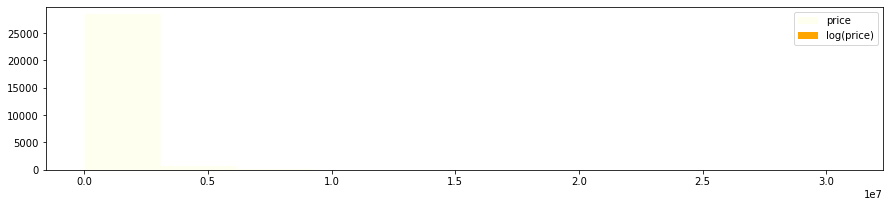

In [214]:
fig, ax = plt.subplots(figsize=(15,3))
ax.hist(y, label="price", color="ivory")
ax.hist(y_log, color="orange", label="log(price)")
ax.legend();

Cant even see the log scaled distribution.  

In [136]:
# df.select_dtypes('number')

In [346]:
y_log_model = sm.OLS(y_log, sm.add_constant(x_sqft_log))
y_log_results = y_log_model.fit()

print(y_log_results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     560.7
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:22:11   Log-Likelihood:                -7013.3
No. Observations:               29200   AIC:                         1.428e+04
Df Residuals:                   29073   BIC:                         1.533e+04
Df Model:                         126                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [124]:
mean_absolute_error(y_log, sqft_log_results.predict(sm.add_constant(x_sqft_log)))

1083774.406333596

In [125]:
mean_squared_error(y_log, sqft_log_results.predict(sm.add_constant(x_sqft_log)), squared=False)

1239567.7012364634

Its very interesting.  The 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

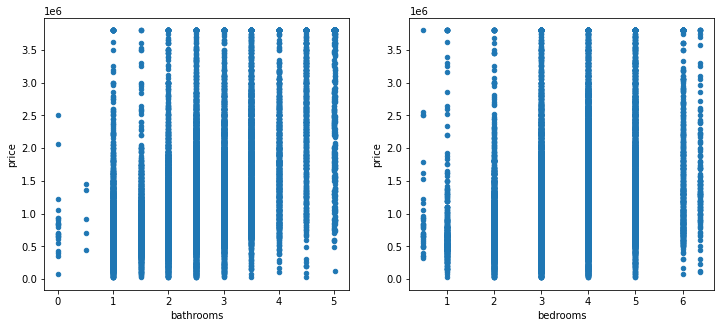

In [471]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='bathrooms', y='price', ax=ax1)
df.plot.scatter(x='bedrooms', y='price', ax=ax2)

<AxesSubplot:xlabel='bathrooms', ylabel='Density'>

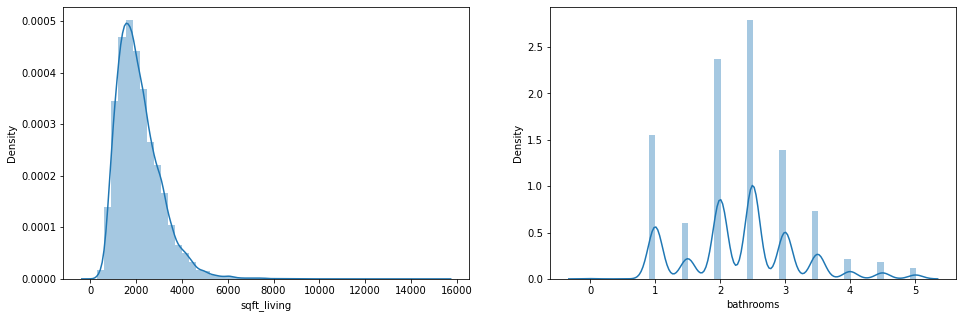

In [478]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X1['sqft_living'])
plt.subplot(1,2,2)
sns.distplot(X1['bathrooms'])

AttributeError: 'DataFrame' object has no attribute 'sns'

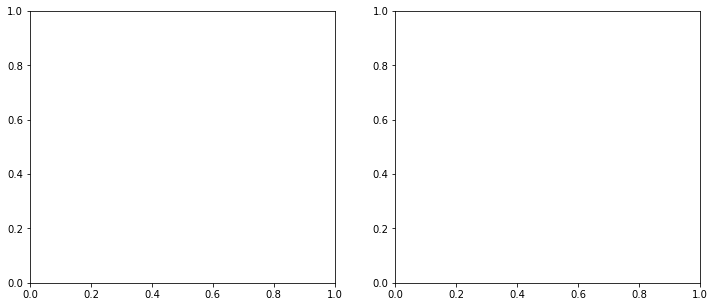

In [481]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.sns.scatterplot(x='sqft_lot', y='price', data=X1)
df.sns.scatterplo(x='floors', y='price', ax=X1)

<AxesSubplot:xlabel='floors', ylabel='Density'>

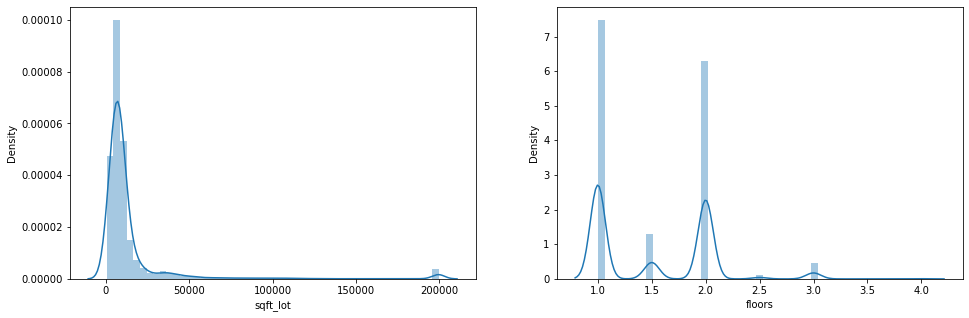

In [474]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_lot'])
plt.subplot(1,2,2)
sns.distplot(df['floors'])

## Continuous numerice predictors

<AxesSubplot:xlabel='sqft_garage', ylabel='price'>

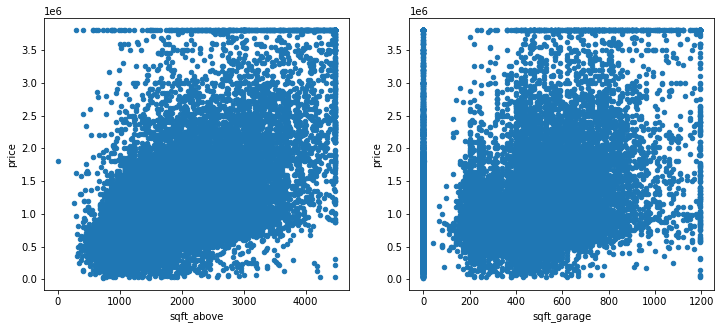

In [482]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_above', y='price', ax=ax1)
df.plot.scatter(x='sqft_garage', y='price', ax=ax2)

<AxesSubplot:xlabel='sqft_garage', ylabel='Density'>

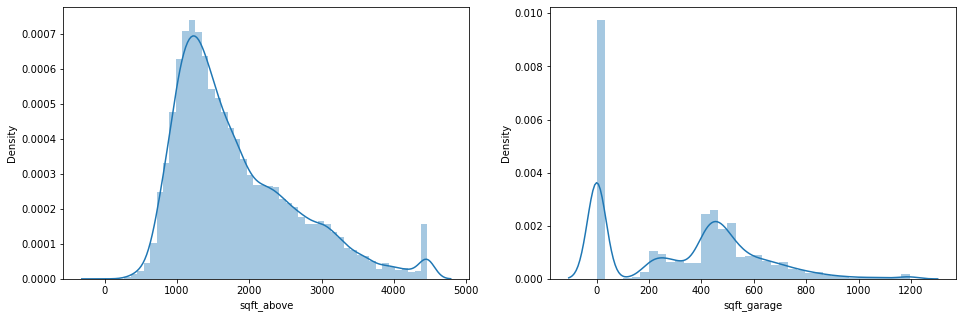

In [483]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_above'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_garage'])

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

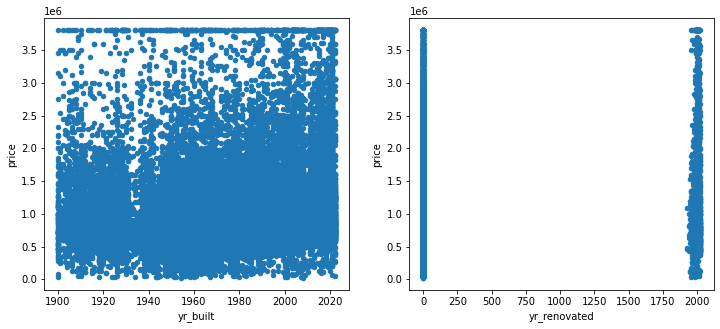

In [484]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='yr_built', y='price', ax=ax1)
df.plot.scatter(x='yr_renovated', y='price', ax=ax2)

<AxesSubplot:xlabel='yr_renovated', ylabel='Density'>

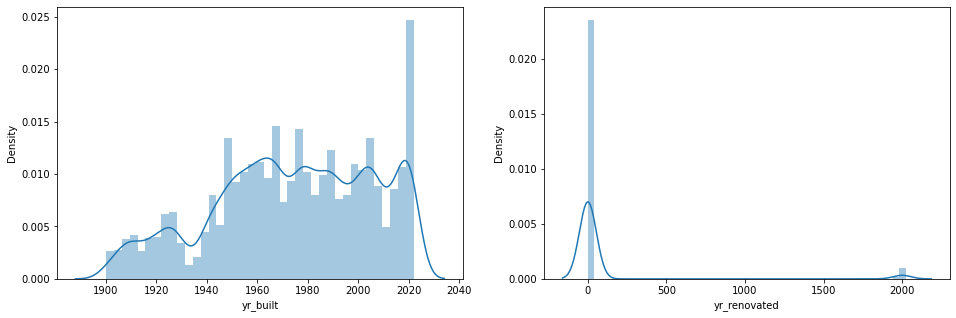

In [485]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['yr_built'])
plt.subplot(1,2,2)
sns.distplot(df['yr_renovated'])

<AxesSubplot:xlabel='sqft_patio', ylabel='price'>

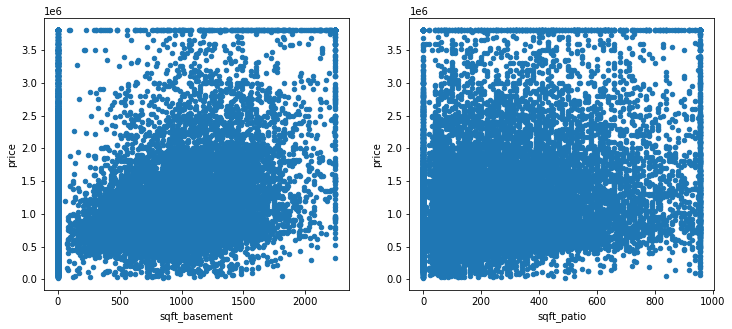

In [486]:
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
df.plot.scatter(x='sqft_basement', y='price', ax=ax1)
df.plot.scatter(x='sqft_patio', y='price', ax=ax2)

<AxesSubplot:xlabel='sqft_basement', ylabel='Density'>

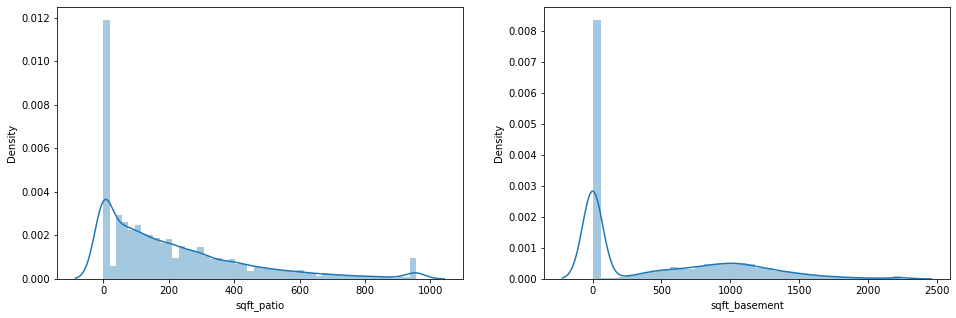

In [488]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_patio'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_basement'])

There is some real symetry in the grade category.  As the grade increases, it appears that the average price of homes increases as well.  Good views and waterfront properties also seem correlated positively with price, which is understandable.  

In [ ]:
# cats3 = ['nuisance', 'sewer_system', 'greenbelt']
# fig, axes = plt.subplots(ncols=len(cats3), figsize=(12,5))
# for index, feature in enumerate(cats3):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=axes[index])

Not much can be gleaned from these bar charts.  

In [ ]:
# plt.scatter(df1.sewer_system, df1.price)

In [ ]:
# plt.scatter(df1.greenbelt, df1.price)

In [ ]:
# fig, (ax1, ax2) = plt.subplots (ncols=2, figsize = (12, 5))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='condition', y='price', ax=ax1)
# df1.sort_values(by='price', ascending=False).plot.scatter(x='view', y='price', ax=ax2)

In [ ]:
# fig, (ax) = plt.subplots (ncols=1, figsize = (15, 10))
# df1.sort_values(by='price', ascending=False).plot.scatter(x='grade', y='price', ax=ax)

The explained variance is higher, but the MAE is worse than our baseline model.  This model is now off by about $359,121.21 for any given prediction.  We will need to adjust the model.  We will attempt some partial regressions below to see what stands out.   

## Partial regression of Grade, sqft_living, and waterfront

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


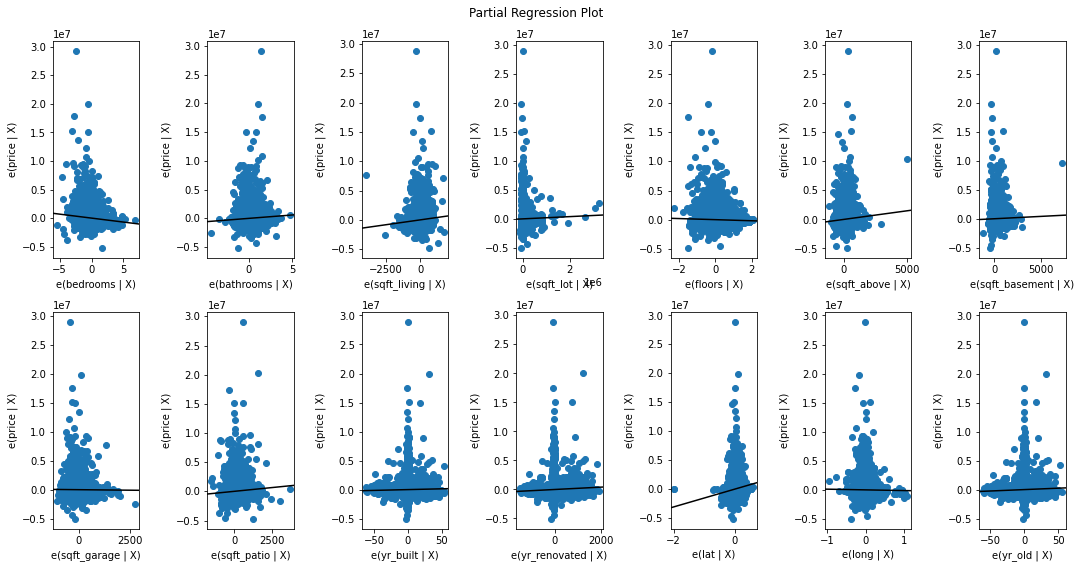

In [492]:
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_partregress_grid(
    results, 
    exog_idx=list(X.columns),
    grid=(2,7),
    fig=fig)
plt.tight_layout()
plt.show()

## Model and partial of Sqft Living, Waterfront, and View

In [ ]:
# fig = plt.figure(figsize=(15,8))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter2.columns),
#     grid=(2,7),
#     fig=fig)
# plt.tight_layout()
# plt.show()

While I feel strongly about sqft living, I am beginning to think view does not have much impact on price as we predicted.  Perhaps the relationship can be better explained by a term or some transformation.  

# Neighborhood

In [ ]:
# Neigh = ['Neighborhood']
# fig, ax = plt.subplots(ncols=len(Neigh), figsize=(12,5))
# for index, feature in enumerate(Neigh):
#     df1.groupby(feature).mean().sort_values(by='price', ascending=False).plot.bar(
#         y='price', ax=ax)


Neighborhood really seems to explain a great deal about the variance in price, and it reduced our MAE down from our baseline.  Our predictions are now around $313,516.77 off by any given predictor.    

In [ ]:
# fig = plt.figure(figsize=(30,220))
# sm.graphics.plot_partregress_grid(
#     iter_results, 
#     exog_idx=list(X_iter.columns),
#     grid=(14,15),
#     fig=fig)
# plt.tight_layout()
# plt.show()

In [ ]:
# X_iter_Neigh

In [ ]:
# fig = plt.figure(figsize=(275,475))
# sm.graphics.plot_partregress_grid(
#     results, 
#     exog_idx=list(X_iter_Neigh.columns),
#     grid=(16,16),
#     fig=fig)
# plt.tight_layout()
# plt.show()

## Log 

In [ ]:
# X_log = df['sqft_lot']

# fig, ax = plt.subplots(ncols=2, figsize=(8,10))

# ax = ax
# left_ax.scatter(, y, alpha=0.5)
# left_ax.set_xlabel("sqft_lot")
# left_ax.set_ylabel("price")
    
# # Plot log transformed version
# right_ax = ax
# right_ax.scatter(np.log(X_log), np.log(y), alpha=0.5)
# right_ax.set_xlabel("log sqft_lot")
# right_ax.set_ylabel("log price")
    
# fig.suptitle("Raw vs. Log Transformed")

# fig.tight_layout()

In [ ]:
X_log = X[candidates].copy()

X_log.describe()

In [ ]:
for column in X_log.columns:
    X_log[f"log_{column}"] = np.log(X_log[column])
    X_log.drop(column, axis=1, inplace=True)
    
X_log

In [ ]:
y_log = np.log(y)
y_log.name = "log_SalePrice"
y_log

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(y_log)

In [ ]:
model_1 = sm.OLS(y_log, sm.add_constant(X_log))
results2 = model_1.fit()
results2.summary()

Drop columns not correlated.  per gp 9-19.  

In [ ]:
# plt.hist(df1.price)

In [ ]:
# sns.distplot(df1.price, bins=30, kde=True)

## Cleaning data

ccpr function partial 

Took the above code from https://www.datasklr.com/ols-least-squares-regression/variable-selection. 

### Final Model

# section_3

 [section_1](#section_1)


[section_2](#section_2)

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## terms and transformations

Attempted to use GeoPandas and plotly. 

## Conclusion